# Logistic Regression
## Importing necessary libraries

In [770]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

## Fetching Titanic Data from sklearn.datasets 

In [771]:
titanic_data=fetch_openml("titanic",version=1,as_frame=True)
type(titanic_data)

sklearn.utils._bunch.Bunch

In [772]:
df=titanic_data["data"]

In [773]:
df["survived"]=titanic_data["target"]

In [774]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## Understanding the data

In [775]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [776]:
df.shape

(1309, 14)

In [777]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


## visualizing target data df.survived

### Survival plot

<Axes: xlabel='survived', ylabel='count'>

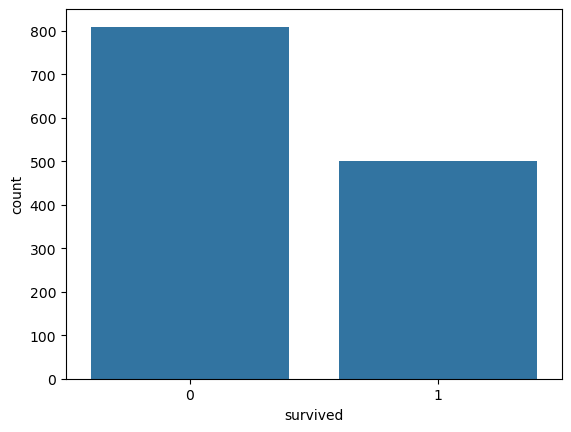

In [779]:
sns.countplot(x="survived",data=df)

#### Large number of people died and small number of people survived

### Survival plot w.r.t. gender

<Axes: xlabel='survived', ylabel='count'>

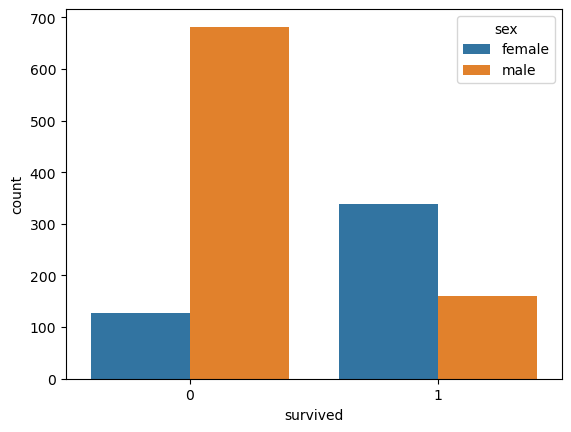

In [780]:
sns.countplot(x="survived",hue="sex",data=df)

#### Female survivals more than male

### Survival plot w.r.t. Pclass

<Axes: xlabel='survived', ylabel='count'>

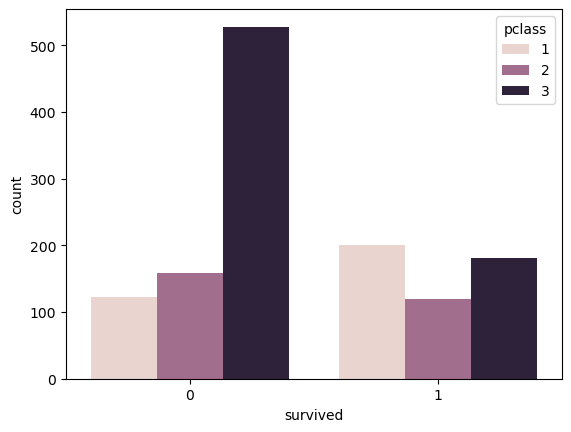

In [781]:
sns.countplot(x="survived",hue="pclass",data=df)

#### Class1 people survived more

### Age group analysis

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <BarContainer object of 10 artists>)

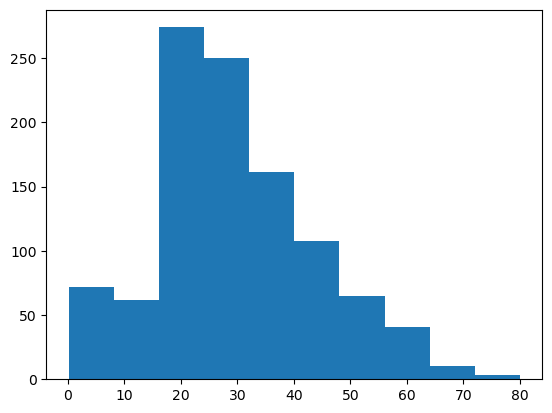

In [782]:
plt.hist(x="age",data=df)

#### Maximum people travelled of age group 17 to 24 followed by age group 25 to 32

<Axes: xlabel='survived', ylabel='count'>

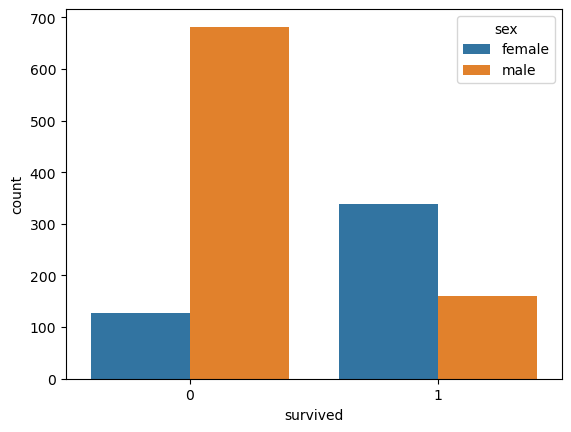

In [783]:
sns.countplot(x="survived",hue="sex",data=df)

## Feature Selection, Feature Extraction, Feature Engineering

In [784]:
miss_vals=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_vals

,0
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713
embarked,0.152788


#### body, boat, cabin have maximum nan values so we drop columns

In [785]:
df1=df.drop(["body","boat","cabin"],axis=1)
df1.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0


#### Combining sibps and parch into family

In [786]:
df1["family"]=df1["sibsp"]+df1["parch"]
df1.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived,family
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1,3
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3


#### Creating new feature

In [787]:
df1["travel_alone"]=pd.Series(map(int,[x==0 for x in df1["family"]]))
df1

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived,family,travel_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO",1,0,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1,3,0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN,0,1,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,0,1,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN,0,0,1
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN,0,0,1


#### Removing unnecessay feature

In [788]:
df2=df1.drop(["sibsp","parch"],axis=1)

In [789]:
df2.head()

,pclass,name,sex,age,ticket,fare,embarked,home.dest,survived,family,travel_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S,"St Louis, MO",1,0,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",1,3,0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S,"Montreal, PQ / Chesterville, ON",0,3,0


<Axes: xlabel='travel_alone', ylabel='count'>

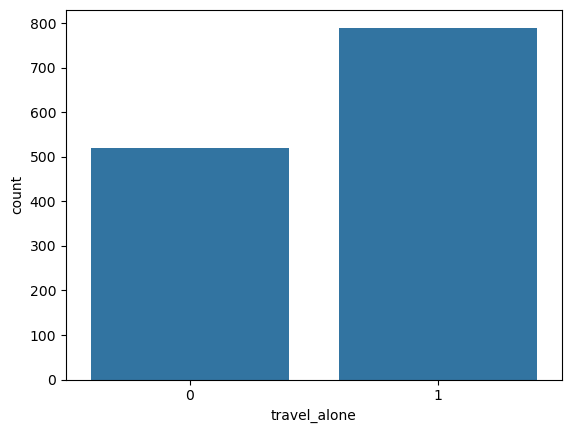

In [790]:
sns.countplot(x="travel_alone",data=df2)

#### Most people travel alone

## Removing unnecessary feature name, ticket, home.dest

In [791]:
df3=df2.drop(["name","ticket","home.dest"],axis=1)

In [792]:
df3.head()

,pclass,sex,age,fare,embarked,survived,family,travel_alone
0,1,female,29.0000,211.3375,S,1,0,1
1,1,male,0.9167,151.5500,S,1,3,0
2,1,female,2.0000,151.5500,S,0,3,0
3,1,male,30.0000,151.5500,S,0,3,0
4,1,female,25.0000,151.5500,S,0,3,0


## Handling categorical features

In [793]:
df3.isnull().sum()

pclass            0
sex               0
age             263
fare              1
embarked          2
survived          0
family            0
travel_alone      0
dtype: int64

In [794]:
df3["age"].mean()

29.8811345124283

In [795]:
df3["age"]=df3.age.fillna(df3["age"].mean())
df3=df3.dropna()
df3.isnull().sum()

pclass          0
sex             0
age             0
fare            0
embarked        0
survived        0
family          0
travel_alone    0
dtype: int64

In [796]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1306 non-null   int64   
 1   sex           1306 non-null   category
 2   age           1306 non-null   float64 
 3   fare          1306 non-null   float64 
 4   embarked      1306 non-null   category
 5   survived      1306 non-null   category
 6   family        1306 non-null   int64   
 7   travel_alone  1306 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 65.4 KB


### Implementing Get dummies

In [797]:
encoded=pd.get_dummies(df3[["sex","embarked"]],dtype=int,drop_first=True)
encoded.head()

,sex_male,embarked_Q,embarked_S
0,0,0,1
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,1


In [798]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1306 non-null   int64   
 1   sex           1306 non-null   category
 2   age           1306 non-null   float64 
 3   fare          1306 non-null   float64 
 4   embarked      1306 non-null   category
 5   survived      1306 non-null   category
 6   family        1306 non-null   int64   
 7   travel_alone  1306 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 65.4 KB


In [799]:
df3=pd.concat([df3,encoded],axis=1)
df3.head()

,pclass,sex,age,fare,embarked,survived,family,travel_alone,sex_male,embarked_Q,embarked_S
0,1,female,29.0000,211.3375,S,1,0,1,0,0,1
1,1,male,0.9167,151.5500,S,1,3,0,1,0,1
2,1,female,2.0000,151.5500,S,0,3,0,0,0,1
3,1,male,30.0000,151.5500,S,0,3,0,1,0,1
4,1,female,25.0000,151.5500,S,0,3,0,0,0,1


In [800]:
df4=df3.drop(["sex","embarked"],axis=1)
df4.head()

,pclass,age,fare,survived,family,travel_alone,sex_male,embarked_Q,embarked_S
0,1,29.0000,211.3375,1,0,1,0,0,1
1,1,0.9167,151.5500,1,3,0,1,0,1
2,1,2.0000,151.5500,0,3,0,0,0,1
3,1,30.0000,151.5500,0,3,0,1,0,1
4,1,25.0000,151.5500,0,3,0,0,0,1


## Splitting data into features and target

In [801]:
y=df4["survived"]
x=df4.drop("survived",axis=1)
x.head()

,pclass,age,fare,family,travel_alone,sex_male,embarked_Q,embarked_S
0,1,29.0000,211.3375,0,1,0,0,1
1,1,0.9167,151.5500,3,0,1,0,1
2,1,2.0000,151.5500,3,0,0,0,1
3,1,30.0000,151.5500,3,0,1,0,1
4,1,25.0000,151.5500,3,0,0,0,1


In [802]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

## Spliting data into testing and training

In [803]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Implementing Logistic Regression

In [804]:
logisticregressor=LogisticRegression(max_iter=200)

In [805]:
logisticregressor.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [806]:
y_pred=logisticregressor.predict(x_test)

## Model evaluation

In [807]:
accuracy_score(y_test,y_pred)

0.816793893129771

In [808]:
confusion_matrix(y_test,y_pred)

array([[143,  21],
       [ 27,  71]], dtype=int64)